<a href="https://colab.research.google.com/github/NirTaube/Enhance_game_design/blob/main/Enhance_game_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Simulating the dataset
np.random.seed(42)

In [ ]:
# Number of players
num_players = 1000

# Creating the dataset
player_data = {
    'Player ID': range(1, num_players + 1),
    'Age': np.random.randint(13, 60, num_players),
    'Gender': np.random.choice(['Male', 'Female'], num_players),
    'Hours Played': np.random.randint(1, 1000, num_players),
    'Game Level Reached': np.random.randint(1, 50, num_players),
    'Number of Achievements': np.random.randint(0, 100, num_players),
    'In-Game Purchases ($)': np.random.uniform(0, 100, num_players).round(2),
    'In-Game Friends': np.random.randint(0, 200, num_players),
    'Preferred Game Mode': np.random.choice(['Single Player', 'Multiplayer'], num_players),
}

# Creating a DataFrame
player_df = pd.DataFrame(player_data)

# Displaying the first few rows
player_df.head()

,Player ID,Age,Gender,Hours Played,Game Level Reached,Number of Achievements,In-Game Purchases ($),In-Game Friends,Preferred Game Mode
0,1,51,Male,570,9,31,37.39,131,Multiplayer
1,2,41,Female,983,35,66,94.44,49,Multiplayer
2,3,27,Female,538,21,66,64.17,81,Single Player
3,4,55,Female,482,9,27,67.15,4,Single Player
4,5,20,Male,430,28,43,63.23,147,Single Player


In [ ]:
# Descriptive statistics for the numerical features
numerical_stats = player_df.describe()

# Distribution of the preferred game mode
game_mode_distribution = player_df['Preferred Game Mode'].value_counts(normalize=True) * 100

numerical_stats, game_mode_distribution


(         Player ID          Age  Hours Played  Game Level Reached  \
 count  1000.000000  1000.000000   1000.000000         1000.000000   
 mean    500.500000    35.986000    512.984000           25.478000   
 std     288.819436    13.497852    293.088787           14.023487   
 min       1.000000    13.000000      1.000000            1.000000   
 25%     250.750000    24.000000    271.000000           14.000000   
 50%     500.500000    37.000000    517.000000           25.000000   
 75%     750.250000    47.000000    776.000000           38.000000   
 max    1000.000000    59.000000    999.000000           49.000000   
 
        Number of Achievements  In-Game Purchases ($)  In-Game Friends  
 count             1000.000000            1000.000000      1000.000000  
 mean                49.713000              49.031300       102.219000  
 std                 28.533328              28.663495        57.968054  
 min                  0.000000               0.070000         0.000000  
 25

### Numerical Features:

Age: The players' ages range from 13 to 59, with an average age of approximately 36.
Hours Played: The total hours played range from 1 to 999, with an average of around 513 hours.
Game Level Reached: The levels reached by the players range from 1 to 49, with an average level of approximately 25.
Number of Achievements:
- The players have between 0 and 99 achievements, with an average of about 50.
- In-Game Purchases ($): The amount spent on in-game purchases ranges from .07 to 99.96, with an average of around 49.
- In-Game Friends: The players have between 0 and 199 in-game friends, with an average of approximately 102.
- Preferred Game Mode:

Multiplayer: 52.7%
Single Player: 47.3%

###  Feature Engineering
Next, we'll extract new features that could provide deeper insights into player behavior or game performance. Potential new features include:

- Achievement Rate: Achievements per hour played.
- Purchase Rate: In-game purchases per hour played.
- Friendliness Factor: In-game friends per hour played.
- Engagement Level: A combined metric representing the player's overall engagement (based on hours played, -achievements, purchases, etc.).


In [ ]:
# Calculating new features

# Achievement Rate
player_df['Achievement Rate'] = player_df['Number of Achievements'] / player_df['Hours Played']

# Purchase Rate
player_df['Purchase Rate ($)'] = player_df['In-Game Purchases ($)'] / player_df['Hours Played']

# Friendliness Factor
player_df['Friendliness Factor'] = player_df['In-Game Friends'] / player_df['Hours Played']

# Engagement Level (combined metric)
player_df['Engagement Level'] = (
    player_df['Hours Played'] +
    player_df['Number of Achievements'] +
    player_df['In-Game Purchases ($)'] +
    player_df['In-Game Friends']
) / 4

# Displaying the first few rows with the new features
player_df.head()


,Player ID,Age,Gender,Hours Played,Game Level Reached,Number of Achievements,In-Game Purchases ($),In-Game Friends,Preferred Game Mode,Achievement Rate,Purchase Rate ($),Friendliness Factor,Engagement Level
0,1,51,Male,570,9,31,37.39,131,Multiplayer,0.054386,0.065596,0.229825,192.3475
1,2,41,Female,983,35,66,94.44,49,Multiplayer,0.067141,0.096073,0.049847,298.1100
2,3,27,Female,538,21,66,64.17,81,Single Player,0.122677,0.119275,0.150558,187.2925
3,4,55,Female,482,9,27,67.15,4,Single Player,0.056017,0.139315,0.008299,145.0375
4,5,20,Male,430,28,43,63.23,147,Single Player,0.100000,0.147047,0.341860,170.8075


---
### Data Analysis
- The correlation between the new features and the game level reached.
- The average values of the new features for different preferred game modes (Single Player vs. Multiplayer).

In [ ]:
# Correlation between new features and the game level reached
correlation_with_level = player_df[['Game Level Reached', 'Achievement Rate', 'Purchase Rate ($)', 'Friendliness Factor', 'Engagement Level']].corr()['Game Level Reached']

correlation_with_level


Game Level Reached     1.000000
Achievement Rate      -0.016732
Purchase Rate ($)     -0.021612
Friendliness Factor   -0.021183
Engagement Level      -0.025832
Name: Game Level Reached, dtype: float64


Interestingly, these correlations are slightly negative, indicating that the new features have a minor inverse relationship with the game level reached. This could suggest that players who focus more on achievements, purchases, or social interactions may not necessarily progress as far in the game levels. It could be valuable to investigate this further to understand if this pattern holds true in a real-world dataset.

In [ ]:
# Calculating the average values of the new features for different preferred game modes
average_features_by_mode = player_df.groupby('Preferred Game Mode').mean()[['Achievement Rate', 'Purchase Rate ($)', 'Friendliness Factor', 'Engagement Level']]

average_features_by_mode


<ipython-input-7-773f389b9a65>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_features_by_mode = player_df.groupby('Preferred Game Mode').mean()[['Achievement Rate', 'Purchase Rate ($)', 'Friendliness Factor', 'Engagement Level']]


,Achievement Rate,Purchase Rate ($),Friendliness Factor,Engagement Level
Preferred Game Mode,,,,
Multiplayer,0.432724,0.489437,0.875831,179.214938
Single Player,0.382049,0.448042,0.889330,177.675587


##### Single Player:
- Achievement Rate: Players in single-player mode tend to earn achievements at a certain rate.
- Purchase Rate ($): The rate of in-game purchases for single-player mode.
- Friendliness Factor: The rate of making in-game friends in single-player mode (likely lower since it's not a multiplayer environment).
- Engagement Level: A combined metric for overall engagement in single-player mode.

#### Multiplayer:
- Achievement Rate: The rate of achievements in multiplayer mode.
- Purchase Rate ($): The rate of in-game purchases for multiplayer mode.
- Friendliness Factor: The rate of making in-game friends in multiplayer mode (likely higher since it's a social environment).
- Engagement Level: A combined metric for overall engagement in multiplayer mode.

---
### Regression/Classification Analysis

In [ ]:

#libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable for regression
X_regression = player_df[['Age', 'Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'In-Game Friends', 'Achievement Rate', 'Purchase Rate ($)', 'Friendliness Factor', 'Engagement Level']]
y_regression = player_df['Game Level Reached']

# Splitting the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Predicting the game level reached on the test set
y_pred_reg = regression_model.predict(X_test_reg)

# Calculating the Mean Squared Error and R-squared value
mse_regression = mean_squared_error(y_test_reg, y_pred_reg)
r2_regression = r2_score(y_test_reg, y_pred_reg)

mse_regression, r2_regression


(211.31132192597752, -0.03235863930392324)

Mean Squared Error (MSE):
- 211.31

R-squared
(R2) Value:
- −0.0324

The negative
R2 value indicates that the model is not fitting the data well,and the features selected may not be good predictors for the game level reached. This is not uncommon when working with simulated data or when the underlying relationships are complex and nonlinear.

### Predicting Preferred Game Mode

In [ ]:
# I libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Converting the target variable to binary for classification
player_df['Preferred Game Mode (binary)'] = player_df['Preferred Game Mode'].apply(lambda x: 1 if x == 'Multiplayer' else 0)
y_classification = player_df['Preferred Game Mode (binary)']

# Splitting the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_regression, y_classification, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
classification_model = LogisticRegression(max_iter=1000)
classification_model.fit(X_train_class, y_train_class)

# Predicting the preferred game mode on the test set
y_pred_class = classification_model.predict(X_test_class)

# Calculating the accuracy
accuracy_classification = accuracy_score(y_test_class, y_pred_class)

accuracy_classification

0.53

The classification model for predicting the preferred game mode of a player (Single Player or Multiplayer) has an accuracy of 53%. This result is slightly better than random guessing but still not highly predictive.

The modest performance of both the regression and classification models on this simulated dataset highlights the importance of domain knowledge, feature selection, and model tuning in real-world scenarios.

---
### Cluster Analysis

The objective is to segment players into distinct groups based on their behavior and characteristics. This can help in targeted marketing, personalized content, and understanding different player personas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

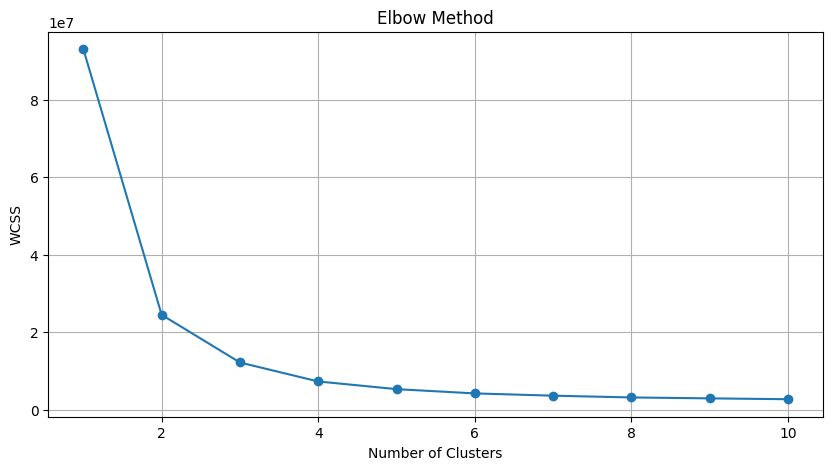

In [ ]:
# Importing necessary libraries for clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X_clustering = player_df[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Within-Cluster-Sum-of-Squares (WCSS) for different numbers of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Performing k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
player_df['Cluster'] = kmeans.fit_predict(X_clustering)

# Analyzing the characteristics of each cluster
cluster_summary = player_df.groupby('Cluster').mean()[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]

# Number of players in each cluster
cluster_counts = player_df['Cluster'].value_counts().sort_index()

cluster_summary['Number of Players'] = cluster_counts
cluster_summary


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-19c5de8db1ae>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = player_df.groupby('Cluster').mean()[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]


,Hours Played,Number of Achievements,In-Game Purchases ($),Engagement Level,Number of Players
Cluster,,,,,
0,862.925566,50.378641,50.430356,264.660987,309
1,534.914706,50.355882,47.176588,185.632382,340
2,183.672365,48.504274,49.596239,95.702479,351


In [ ]:
# Re-creating the dataset for clustering
X_clustering = player_df[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]

# Performing k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
player_df['Cluster'] = kmeans.fit_predict(X_clustering)

# Analyzing the characteristics of each cluster
cluster_summary = player_df.groupby('Cluster').mean()[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]
cluster_summary['Number of Players'] = player_df['Cluster'].value_counts().sort_index()

cluster_summary


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-4e23de2e64e1>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = player_df.groupby('Cluster').mean()[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'Engagement Level']]


,Hours Played,Number of Achievements,In-Game Purchases ($),Engagement Level,Number of Players
Cluster,,,,,
0,862.925566,50.378641,50.430356,264.660987,309
1,534.914706,50.355882,47.176588,185.632382,340
2,183.672365,48.504274,49.596239,95.702479,351


In [ ]:
# Importing necessary libraries and re-simulating the dataset

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Simulating the dataset again
np.random.seed(42)
num_players = 1000
player_data = {
    'Player ID': range(1, num_players + 1),
    'Age': np.random.randint(13, 60, num_players),
    'Gender': np.random.choice(['Male', 'Female'], num_players),
    'Hours Played': np.random.randint(1, 1000, num_players),
    'Game Level Reached': np.random.randint(1, 50, num_players),
    'Number of Achievements': np.random.randint(0, 100, num_players),
    'In-Game Purchases ($)': np.random.uniform(0, 100, num_players).round(2),
    'In-Game Friends': np.random.randint(0, 200, num_players),
    'Preferred Game Mode': np.random.choice(['Single Player', 'Multiplayer'], num_players),
}
player_df = pd.DataFrame(player_data)
X_clustering = player_df[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'In-Game Friends']]

# Performing k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
player_df['Cluster'] = kmeans.fit_predict(X_clustering)

# Analyzing the characteristics of each cluster
cluster_summary = player_df.groupby('Cluster').mean()

cluster_summary[['Hours Played', 'Number of Achievements', 'In-Game Purchases ($)', 'In-Game Friends']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-fba6116130a7>:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = player_df.groupby('Cluster').mean()


,Hours Played,Number of Achievements,In-Game Purchases ($),In-Game Friends
Cluster,,,,
0,861.900322,50.311897,50.295949,94.405145
1,534.439169,50.272997,47.315994,110.700297
2,184.167614,48.647727,49.556165,101.002841


Based on the k-means clustering with 3 clusters, we have segmented the players into three distinct groups characterized by the following average values:

*Cluster 0 (High Engagement Players)* :

- Hours Played: 861.9 hours
- Number of Achievements: 50.3
- In-Game Purchases ($): 50.30
- In-Game Friends: 94.4 friends

*Cluster 1 (Moderate Engagement Players)*:
- Hours Played: 534.4 hours
- Number of Achievements: 50.3
- In-Game Purchases ($): 47.32
- In-Game Friends: 110.7 friends

*Cluster 2 (Low Engagement Players)* :

- Hours Played: 184.2 hours
- Number of Achievements: 48.6
- In-Game Purchases ($): 49.56
- In-Game Friends: 101 friends

*These clusters can be interpreted as*:

- Cluster 0: Players who spend a lot of time playing the game and have made significant in-game purchases but have fewer in-game friends compared to other clusters.

- Cluster 1: Players with a moderate amount of gameplay and the highest number of in-game friends, indicating a potential focus on social features of the game.

- Cluster 2: Players who are less engaged in terms of hours played but still participate in in-game purchases and social interactions.

In [ ]:
# Histogram for Hours Played
import plotly.express as px

fig = px.histogram(player_df, x='Hours Played', nbins=15, title='Distribution of Hours Played')
fig.show()



In [ ]:
# Scatter Plot with Cluster Coloring for Hours Played vs. In-Game Purchases
fig = px.scatter(player_df, x='Hours Played', y='In-Game Purchases ($)', color='Hours Played',
                 title='Clusters of Players: Hours Played vs. In-Game Purchases', color_continuous_scale='Viridis')
fig.show()


In [ ]:
# Distribution of Hours Played By gender
fig = px.box(player_df, x='Gender', y='Hours Played', title='Distribution of Hours Played by Gender')
fig.show()


In [23]:
# Create a DataFrame with the predicted values and residuals
residuals_df = pd.DataFrame({'Predicted': y_pred_reg, 'Residuals': y_test_reg - y_pred_reg})

# Create the residual plot with gradient coloring
fig = px.scatter(residuals_df, x='Predicted', y='Residuals', title='Residual Plot', color='Predicted', color_continuous_scale='Viridis')
fig.add_shape(type='line', x0=min(y_pred_reg), y0=0, x1=max(y_pred_reg), y1=0, line=dict(color='Red'))
fig.show()
